# Customer Segmentation with RFM Analysis and Agglomerative Clustering

URL : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

## Load data

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print('number of rows: ', df.shape[0])
print('number of columns: ', df.shape[1])
df.head()

number of rows:  2240
number of columns:  29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Analysis & Processing

In [3]:
df.info()

rowCount = df.shape[0]
colCount = df.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# get a list of object Dtype columns
obj_list = df.select_dtypes(include=['object']).columns.tolist()

print('Total unique values:')
# get unique values total for each column
for i in obj_list:
    print(i, ":", df[i].nunique())

Total unique values:
Education : 5
Marital_Status : 8
Dt_Customer : 663


In [5]:
# show the value counts of the categorical columns
print(df['Education'].value_counts())
print()
print(df['Marital_Status'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [6]:
# Decriptive statistics of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
# Null Values
df_null = pd.DataFrame(df.isnull().sum(), columns=['total_null'])
df_null['null_value_percentage'] = df_null['total_null'] / len(df) * 100

# Filter out columns with no null values
df_null_with_nulls = df_null[df_null['total_null'] > 0]

df_null_with_nulls

,total_null,null_value_percentage
Income,24,1.071429


In [8]:
print("Total number of duplicated rows:")
df.duplicated().sum()

Total number of duplicated rows:


0

**Insights**

- There is no explanation for the column `Z_CostContact` and `Z_Revenue` in the data dictionary and also `ID` is unused. We will drop these columns.
- `Complain`, `AcceptedCmp3`, `AcceptedCmp2`, `AcceptedCmp1`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` column has very low percentage of 1. We will drop this column.
- `Year_Birth` can be converted to `Age` by subtracting it from the current year.
- Combining `Kidhome` and `Teenhome` into `Children` column.
- `Education` column has some misspelled values. We will fix them.
- `Marital_Status` column has some value that doesnt make sense and has a small number of rows. We will drop these rows.
- `Education` and `Marital_Status` is categorical data. We will convert them to dummy variables.
- `Income` column has very low percentage of outlier. We will remove the outlier.
- `Dt_Customer` column is the date when the customer was enrolled. We will convert it to `Year_Customer` by subtracting it from the current year. And also its still in object type, we will convert it to datetime type.
- Recency already in the data, so we only need to calculate the Frequency and Monetary
- Frequency calculated by counting the number of purchases (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, and `NumDealsPurchases`)
- Monetary calculated by multiplying the number of purchases with the average amount of purchases (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`)


>The data last updated in 2021, so we assume the current year is **2021**


In [9]:
# drop Columns

drop_columns = ['Z_CostContact', 'Z_Revenue', 'ID', 'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']
df = df.drop(drop_columns, axis=1)
print('Column Count after column removal: ', df.shape[1])

Column Count after column removal:  19


In [10]:
# remove outlier
df = df.dropna()

# remove Alone, Absurd, YOLO in marital status
df = df[~df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]
df.reset_index(drop=True, inplace=True)

print('Row Count after row removal: ', df.shape[0])

Row Count after row removal:  2209


In [11]:
# rename column values
df['Education'].replace(['Basic', '2n Cycle', 'Graduation'], [
                        'no-degree', 'Master', 'Bachelor'], inplace=True)

In [12]:
# Combine 'kidhome' and 'teenhome' into 'children'

df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

In [13]:
# add Fequency and Monetary columns to the dataframe
frequency = ['NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumDealsPurchases']
monetary = ['MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['Frequency'] = df[frequency].sum(axis=1)
df['Frequency'] = df['Frequency'].astype(int)
df['Monetary'] = df[monetary].sum(axis=1)
df['Monetary'] = df['Monetary'].astype(int)

# df = df.drop(frequency, axis=1)
# df = df.drop(monetary, axis=1)

In [14]:
df_rfm = df[['Recency', 'Frequency', 'Monetary']]
df_rfm.head()

,Recency,Frequency,Monetary
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422


In [15]:
# Feature engineering
df['Age'] = 2021 - df['Year_Birth']

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Year_Customer'] = 2021 - df['Dt_Customer'].dt.year

df = df.drop(['Dt_Customer', 'Year_Birth'], axis=1)

In [16]:
# encoding categorical columns
# Education : ordinal encoding
# Marital Status : one-hot encoding
# dfEncoded = df.copy()

# ordinal = OrdinalEncoder()

# # Ordinal encode 'Education'
# dfEncoded['Education'] = ordinal.fit_transform(
#     dfEncoded['Education'].values.reshape(-1, 1))

# # One-hot encode 'Marital_Status'
# onehot = pd.get_dummies(dfEncoded['Marital_Status'], prefix='Status_')
# dfEncoded = pd.concat([dfEncoded, onehot], axis=1)

# # Drop 'Education' and 'Marital_Status' columns
# dfEncoded = dfEncoded.drop(['Marital_Status'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2209 non-null   object 
 1   Marital_Status       2209 non-null   object 
 2   Income               2209 non-null   float64
 3   Recency              2209 non-null   int64  
 4   MntWines             2209 non-null   int64  
 5   MntFruits            2209 non-null   int64  
 6   MntMeatProducts      2209 non-null   int64  
 7   MntFishProducts      2209 non-null   int64  
 8   MntSweetProducts     2209 non-null   int64  
 9   MntGoldProds         2209 non-null   int64  
 10  NumDealsPurchases    2209 non-null   int64  
 11  NumWebPurchases      2209 non-null   int64  
 12  NumCatalogPurchases  2209 non-null   int64  
 13  NumStorePurchases    2209 non-null   int64  
 14  NumWebVisitsMonth    2209 non-null   int64  
 15  Children             2209 non-null   i

In [18]:
# dfEncoded.info()

## Clustering

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# min max scaler
from sklearn.preprocessing import MinMaxScaler

# sclae the df_rfm
scaler = MinMaxScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=df_rfm.columns)


X_train, X_test = train_test_split(df_rfm_scaled, test_size=0.2, random_state=42)

In [20]:
df_rfm_scaled

,Recency,Frequency,Monetary
0,0.585859,0.568182,0.639683
1,0.383838,0.136364,0.008730
2,0.262626,0.477273,0.305952
3,0.262626,0.181818,0.019048
4,0.949495,0.431818,0.165476
...,...,...,...
2204,0.464646,0.409091,0.530159
2205,0.565657,0.500000,0.174206
2206,0.919192,0.431818,0.490476
2207,0.080808,0.522727,0.332540


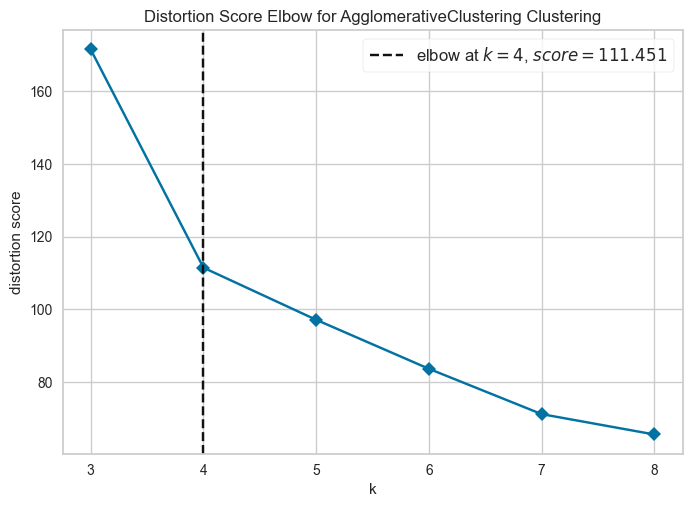

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer

# Create Agglomerative Clustering model
model = AgglomerativeClustering()

# Use the KElbowVisualizer with silhouette score
visualizer = KElbowVisualizer(model, k=(3,9), timings=False)
visualizer.fit(df_rfm_scaled)

# Display the elbow visualization
visualizer.show()

In [22]:
agloCluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward').fit(df_rfm_scaled)

In [23]:
# evaluate the model using silhouette_score and distorion score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette Score: ', silhouette_score(df_rfm_scaled, agloCluster.labels_))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_rfm_scaled, agloCluster.labels_))

Silhouette Score:  0.38029104646926654
Calinski Harabasz Score:  1787.8766003936012


In [24]:
df_rfm['cluster'] = agloCluster.labels_
df_rfm.head()

,Recency,Frequency,Monetary,cluster
0,58,25,1617,1
1,38,6,27,3
2,26,21,776,0
3,26,8,53,3
4,94,19,422,1


In [25]:
# create visualization after clustering using sns

# sns.set(style="white", color_codes=True)
# # sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set(font_scale=1.2)

# create a countplot
print('Cluster Count:')
print(df_rfm['cluster'].value_counts())



Cluster Count:
cluster
2    624
1    576
0    550
3    459
Name: count, dtype: int64


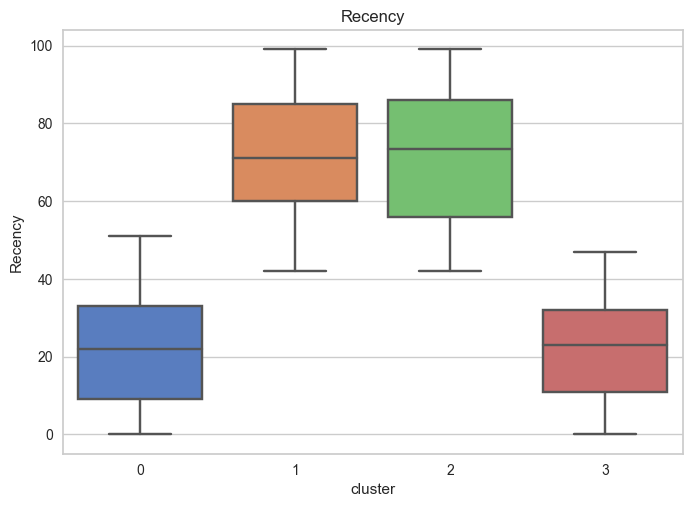

In [26]:
sns.boxplot(x = df_rfm.cluster, y = df_rfm.Recency, palette='muted')
plt.title('Recency')
plt.show()

Cluster 0 and 3 has the lowest amount of Recency, followed by cluster 1 and 2

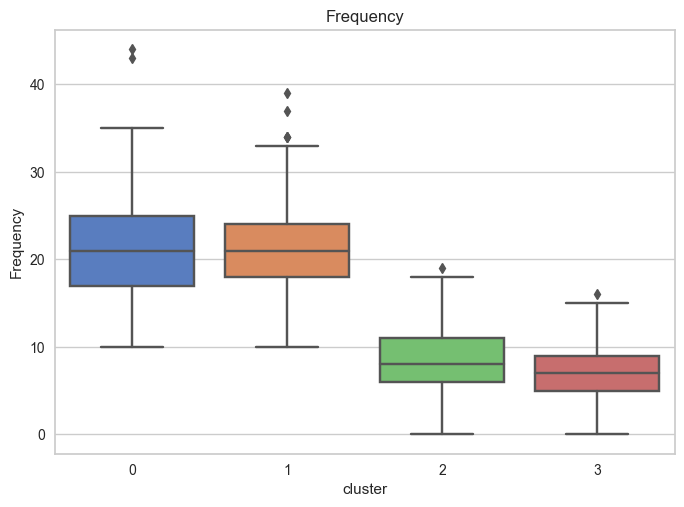

In [27]:
sns.boxplot(x = df_rfm.cluster, y = df_rfm.Frequency, palette='muted')
plt.title('Frequency')
plt.show()

Cluster 0 and 1 has the highest amount of Frequency, followed by cluster 2 and then cluster 3

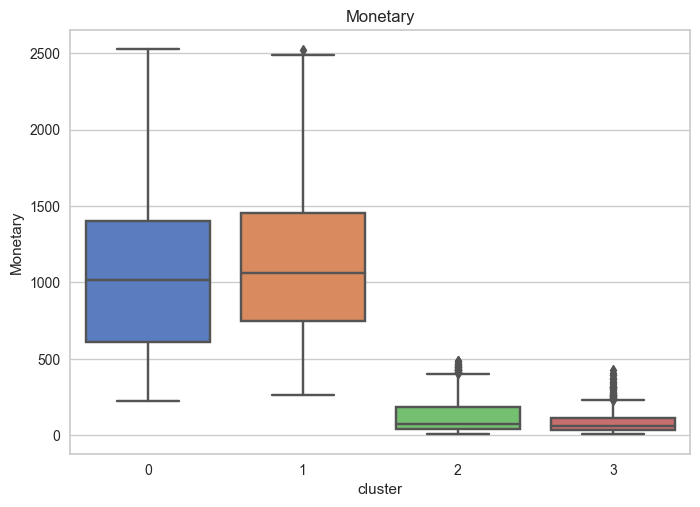

In [28]:
sns.boxplot(x = df_rfm.cluster, y = df_rfm.Monetary, palette='muted')
plt.title('Monetary')
plt.show()

Cluster 1 and 0 has the highest amount of Monetary, followed by cluster 2 and then cluster 3

From analysis above, we can say that:
- **Cluster 0** : Best/Loyal Customers `(Low Recency, High Frequency, High Monetary)`
- **Cluster 1** : Intermittent High-Spenders `(High Recency, High Frequency, High Monetary) `
- **Cluster 2** : Churned Customers `(High Recency, Low Frequency, Low Monetary)`
- **Cluster 3** : Regular Customer `(Low Recency, Low Frequency, Low Monetary)` 

In [29]:
# change the cluster column to descriptive names

df_rfm['cluster'] = df_rfm['cluster'].replace([0, 1, 2, 3], ['Best', 'Intermittent', 'Churned', 'Regular'])

df_rfm.head()

,Recency,Frequency,Monetary,cluster
0,58,25,1617,Intermittent
1,38,6,27,Regular
2,26,21,776,Best
3,26,8,53,Regular
4,94,19,422,Intermittent


Cluster Count:
cluster
Churned         624
Intermittent    576
Best            550
Regular         459
Name: count, dtype: int64


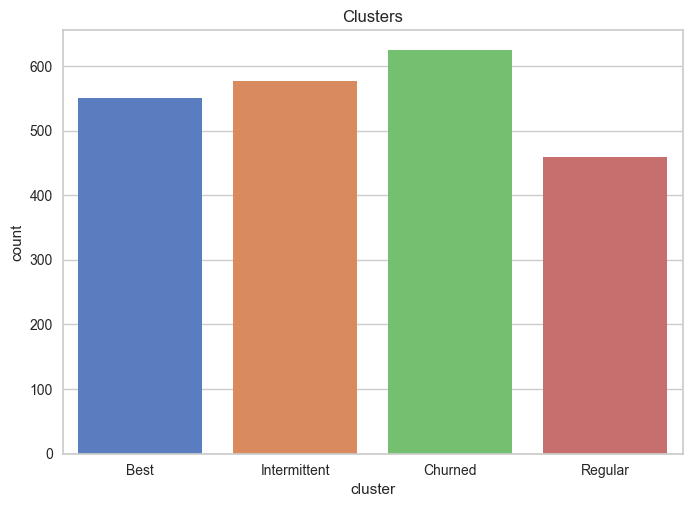

In [30]:
order = ['Best', 'Intermittent', 'Churned', 'Regular']
# create a countplot
print('Cluster Count:')
print(df_rfm['cluster'].value_counts())

sns.countplot(x='cluster', data=df_rfm, palette='muted', order=order)
plt.title('Clusters')
plt.show()

# Further Cluster Analysis

In [31]:
df['cluster'] = df_rfm['cluster']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2209 non-null   object 
 1   Marital_Status       2209 non-null   object 
 2   Income               2209 non-null   float64
 3   Recency              2209 non-null   int64  
 4   MntWines             2209 non-null   int64  
 5   MntFruits            2209 non-null   int64  
 6   MntMeatProducts      2209 non-null   int64  
 7   MntFishProducts      2209 non-null   int64  
 8   MntSweetProducts     2209 non-null   int64  
 9   MntGoldProds         2209 non-null   int64  
 10  NumDealsPurchases    2209 non-null   int64  
 11  NumWebPurchases      2209 non-null   int64  
 12  NumCatalogPurchases  2209 non-null   int64  
 13  NumStorePurchases    2209 non-null   int64  
 14  NumWebVisitsMonth    2209 non-null   int64  
 15  Children             2209 non-null   i

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Frequency,Monetary,Age,Year_Customer,cluster
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,0,25,1617,64,9,Intermittent
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,2,6,27,67,7,Regular
2,Bachelor,Together,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,0,21,776,56,8,Best
3,Bachelor,Together,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,1,8,53,37,7,Regular
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,1,19,422,40,7,Intermittent


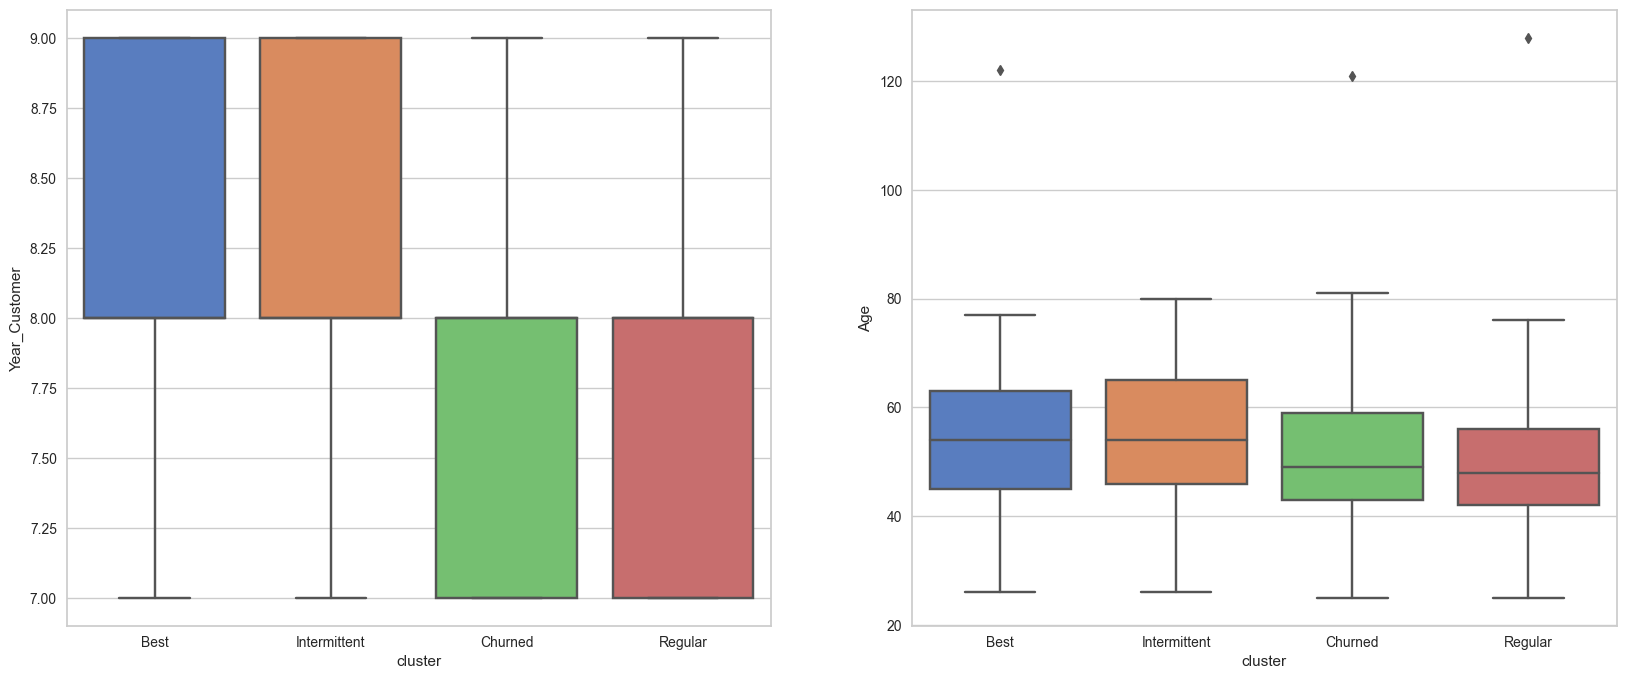

In [32]:
# create multi boxplot for Year_Customer vs cluster and Age vs cluster
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(ax=axes[0], x='cluster', y='Year_Customer', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[1], x='cluster', y='Age', data=df, palette='muted', order=order)
plt.show()


- Membership Duration vs. Clusters:
  - "Intermittent High Spenders" and "Best Customers" have the longest membership duration, indicating their loyalty to the business.
<br>
- Customer Age vs. Clusters:
  - "Intermittent High Spenders" and "Best Customers" are the oldest in terms of age, further emphasizing their long-term engagement with the store.

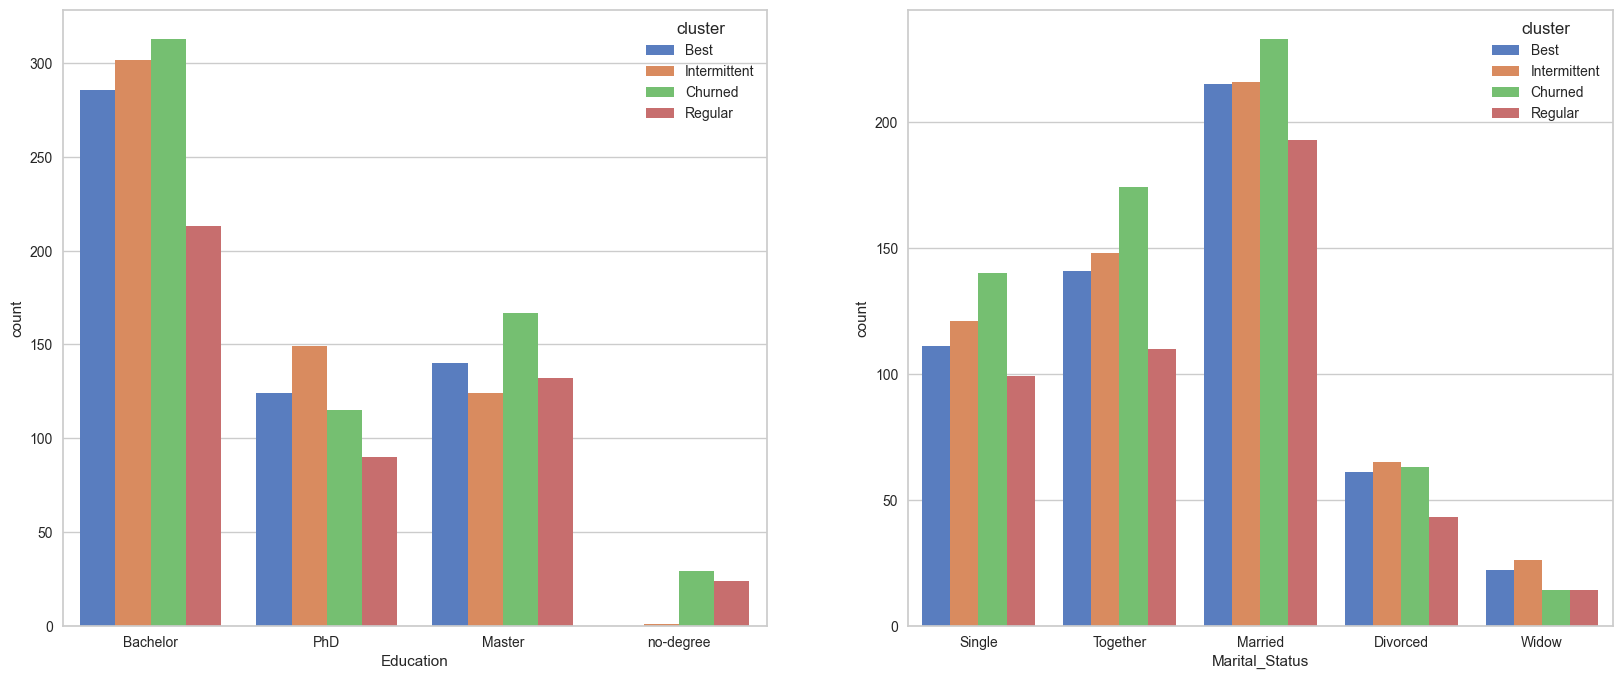

In [33]:
# create multi boxplot for education and marital status vs cluster

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(ax=axes[0], x='Education', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[1], x='Marital_Status', hue='cluster', data=df, palette='muted', hue_order=order)
plt.show()

With this visualization, we can see that "Education" and "Marital_Status" doesnt have a significant effect on the clusters. Each of the cluster has a similar distribution of "Education" and "Marital_Status"

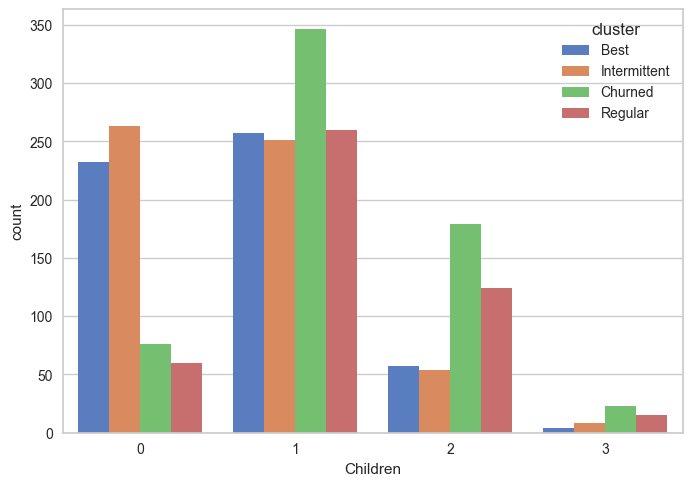

In [34]:
# Create plot for children vs cluster

sns.countplot(x='Children', hue='cluster', data=df, palette='muted', hue_order=order)
plt.show()

- "Churned" customers are populated in the family of 1 child and above
- "Best Customers" and "Intermittent High Spenders" are populated in the family of 0 and 1 child

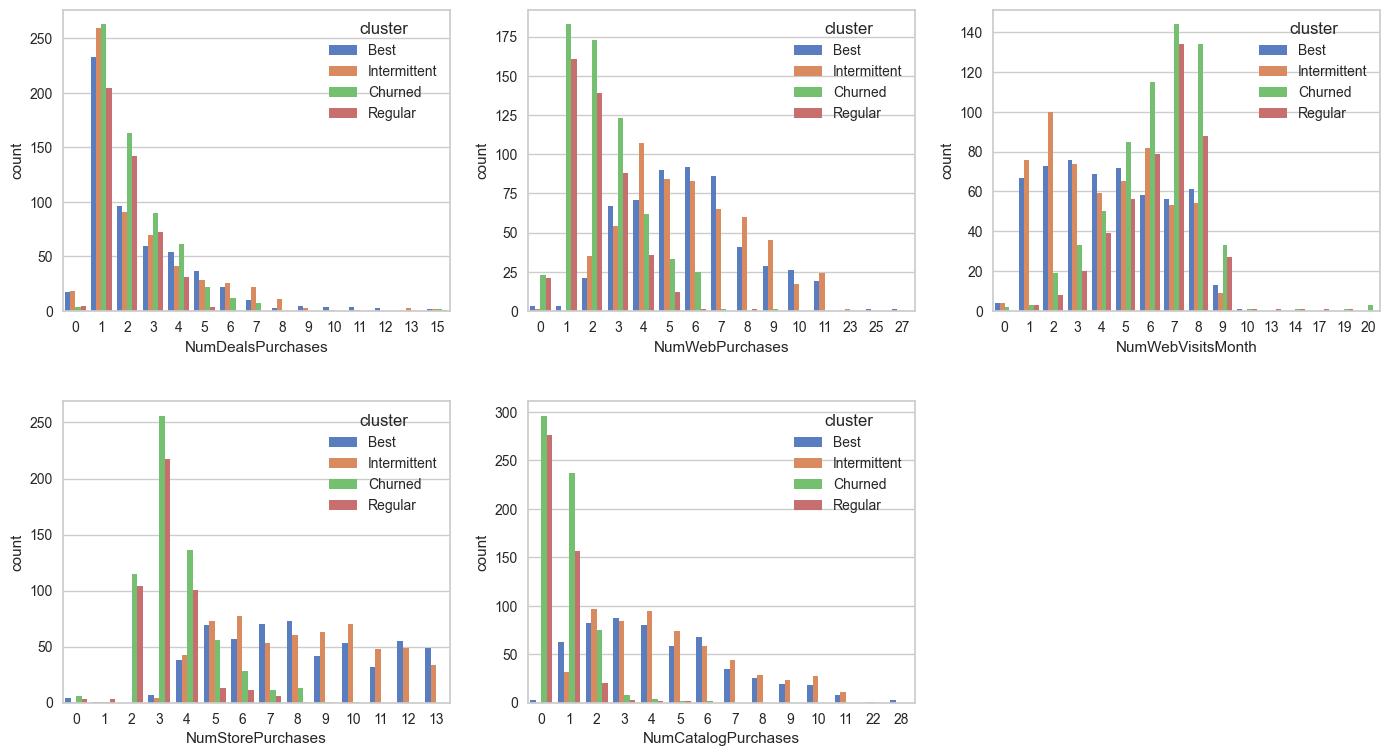

In [35]:
# Create plot for cluster vs multiple purchases

fig, axes = plt.subplots(2, 3, figsize=(17, 9))
sns.countplot(ax=axes[0, 0], x='NumDealsPurchases', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[0, 1], x='NumWebPurchases', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[0, 2], x='NumWebVisitsMonth', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[1, 0], x='NumStorePurchases', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[1, 1], x='NumCatalogPurchases', hue='cluster', data=df, palette='muted', hue_order=order)
axes[1, 2].axis('off')
plt.subplots_adjust(hspace=0.3)
plt.show()

- in `NumDealsPurchases` feature, every cluster has a similar pattern. The majority of customer only made 1 purchase with a deal. But there is a small percentage of customer that made 2 purchases with a deal. And there is a very small percentage of customer that made 3 purchases and above with a deal.
- `NumWebPurchases` feature give us information that for `Regular` and `Churned` customer, the majority of them only made 1 to 3 purchase. But for `Best Customers` and `Intermittent High Spenders`, the majority of them made 4 purchases and above.
- `NumWebVisitsMonth` feature is contrary to `NumWebPurchases` feature. For `Regular` and `Churned` customer, the majority of them made 6 to 8 visits. But for `Best Customers` and `Intermittent High Spenders`, the majority of them made 1 to 3 visits.
- `Regular` and `Churned` customer is make a less purchase in the store (`NumStorePurchases`) compared to `Best Customers` and `Intermittent High Spenders`.
- same case occur in `NumCatalogPurchases` feature. `Regular` and `Churned` customer is make a less purchase in the catalog compared to `Best Customers` and `Intermittent High Spenders`.

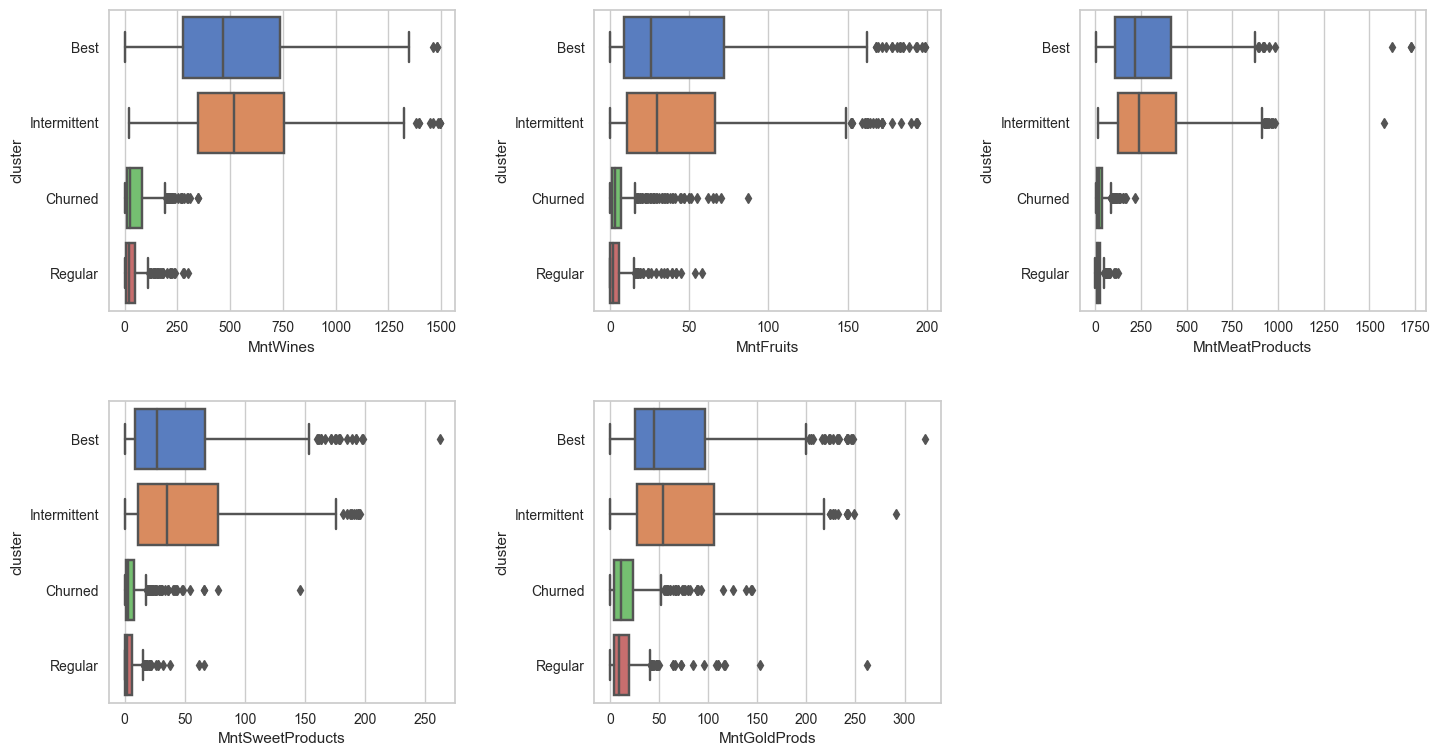

Total wine purchase : 674174
Total fruit purchase : 58218
Total meat purchase : 369259
Total sweet purchase : 59808
Total gold purchase : 96854


In [42]:
# Create plot for cluster vs multiple product purchases

fig, axes = plt.subplots(2, 3, figsize=(17, 9))
sns.boxplot(ax=axes[0, 0], x='MntWines', y='cluster', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[0, 1], x='MntFruits', y='cluster', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[0, 2], x='MntMeatProducts', y='cluster', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[1, 0], x='MntSweetProducts', y='cluster', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[1, 1], x='MntGoldProds', y='cluster', data=df, palette='muted', order=order)
axes[1, 2].axis('off')
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()

print("Total wine purchase :" , df['MntWines'].sum())
print("Total fruit purchase :" , df['MntFruits'].sum())
print("Total meat purchase :" , df['MntMeatProducts'].sum())
print("Total sweet purchase :" , df['MntSweetProducts'].sum())
print("Total gold purchase :" , df['MntGoldProds'].sum())

- The most pular product is `Wines` followed by `Meat Products` and `Gold Products`
- `Best` and `Intermittent` customer buy a lot of wines product

# Recommendation

## Best Customers
- Recognize and reward "Best Customers" for their long-term loyalty. Consider offering them exclusive privileges, such as early access to sales, premium customer support, or personalized gifts on special occasions.
- Create a dedicated loyalty program for this segment with tiered benefits to encourage them to maintain their high spending levels, such as free shipping, exclusive discounts, or free gifts.
- Focus on building long-term relationships rather than just transactions. Prioritize customer satisfaction and consider periodic check-ins or loyalty surveys to gauge their evolving preferences.

## Intermittent High Spenders
- Implement a reminder system to notify them about ongoing promotions or limited-time deals.
- Create bundles or packages that encourage bulk purchasing, offering them cost savings for buying in larger quantities.
- Tailor the offers to align with the preferences and needs of older customers.

## Regular Customers
- Introduce subscription-based services or loyalty programs that offer benefits. Subscriptions can encourage more frequent and predictable purchases.
- Create a sense of urgency by running limited-time promotions, flash sales, or clearance events.
- Encourage repeat purchases by offering personalized discounts and promotions based on their past purchase history, especially for items related to their previous purchases.

## Churned Customers
- Focus on reactivating these customers by sending win-back campaigns with attractive incentives, such as special discounts or offers for returning customers.
- Show them ads featuring items they've viewed or wishlisted but didn't purchase.
- Showcase positive reviews and testimonials from satisfied customers, as social proof can influence purchasing decisions.
